# Global Dataset Analysis

This notebook provides a comprehensive analysis of the combined agricultural dataset, aggregating statistics from all source datasets.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image

# Setup plotting style
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline

In [18]:
# Configuration
DATA_ROOT = Path("../data/processed/dataset")
CSV_PATH = DATA_ROOT / "combined_dataset.csv"

In [19]:
# Load Data
if not CSV_PATH.exists():
    print(f"Error: Combined CSV not found at {CSV_PATH}")
else:
    df = pd.read_csv(CSV_PATH)
    print(f"Loaded {len(df)} images from {len(df['source'].unique())} datasets.")
    display(df.head())

Loaded 196074 images from 8 datasets.


,filename,label,crop,disease,source,path
0,image-00001.jpg,pepper_bell_bacterial_spot,pepper,bell_bacterial_spot,plantvillage,PlantVillage_processed/pepper_bell_bacterial_s...
1,image-00002.jpg,pepper_bell_bacterial_spot,pepper,bell_bacterial_spot,plantvillage,PlantVillage_processed/pepper_bell_bacterial_s...
2,image-00003.jpg,pepper_bell_bacterial_spot,pepper,bell_bacterial_spot,plantvillage,PlantVillage_processed/pepper_bell_bacterial_s...
3,image-00004.jpg,pepper_bell_bacterial_spot,pepper,bell_bacterial_spot,plantvillage,PlantVillage_processed/pepper_bell_bacterial_s...
4,image-00005.jpg,pepper_bell_bacterial_spot,pepper,bell_bacterial_spot,plantvillage,PlantVillage_processed/pepper_bell_bacterial_s...


## 1. Dataset Distribution
How many images are contributed by each source dataset?

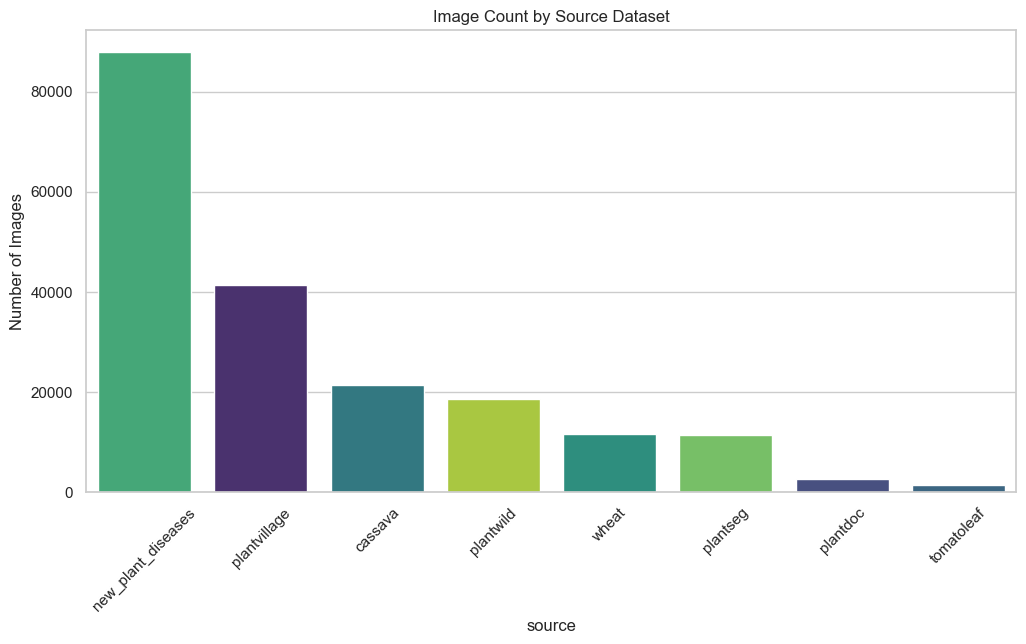

,Count
source,
new_plant_diseases,87867
plantvillage,41276
cassava,21397
plantwild,18542
wheat,11603
plantseg,11458
plantdoc,2572
tomatoleaf,1359


In [20]:
if 'df' in locals():
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='source', order=df['source'].value_counts().index, hue='source', palette='viridis', legend=False)
    plt.title('Image Count by Source Dataset')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Images')
    plt.show()
    
    display(df['source'].value_counts().to_frame(name='Count'))

## 2. Crop Analysis
Which crops are most represented in the global dataset?

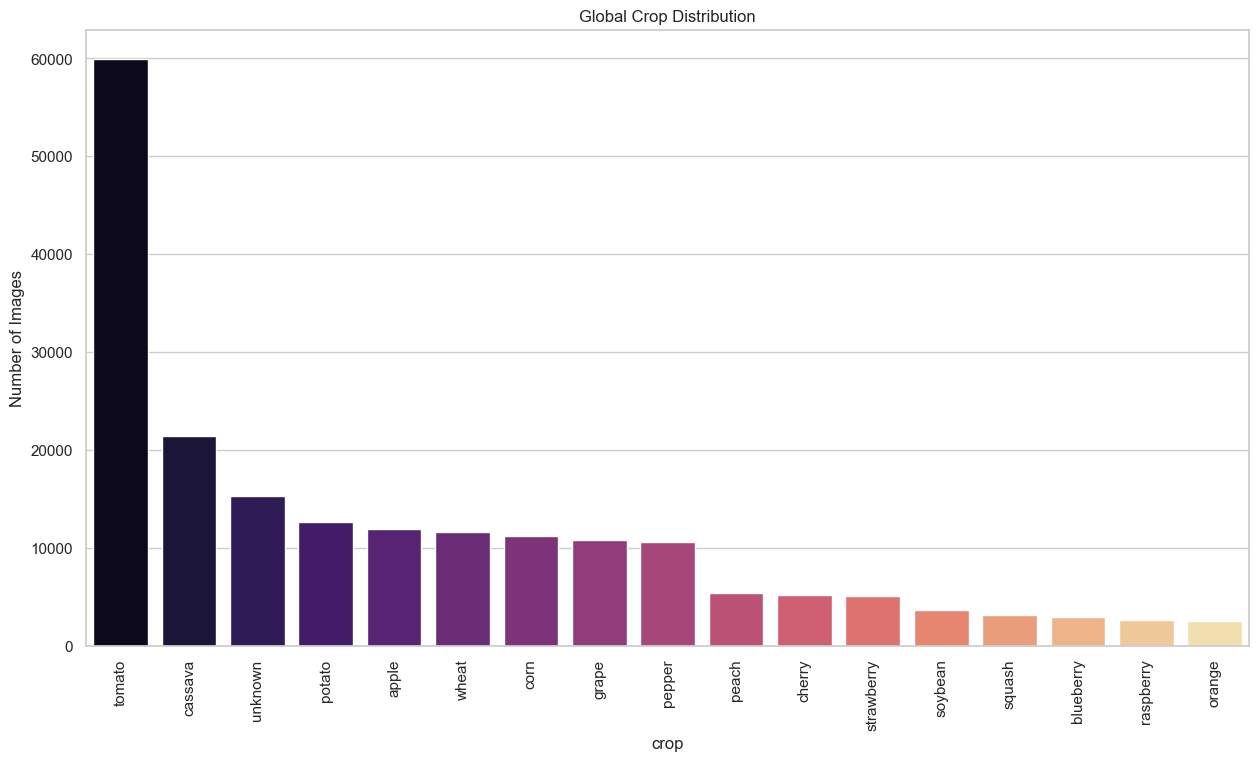

In [21]:
if 'df' in locals():
    # Count crops
    crop_counts = df['crop'].value_counts()
    
    plt.figure(figsize=(15, 8))
    sns.barplot(x=crop_counts.index, y=crop_counts.values, hue=crop_counts.index, palette='magma', legend=False)
    plt.title('Global Crop Distribution')
    plt.xticks(rotation=90)
    plt.ylabel('Number of Images')
    plt.show()

## 3. Crop vs. Dataset Matrix
How do different datasets overlap in terms of crop coverage? This is crucial for domain adaptation tasks.

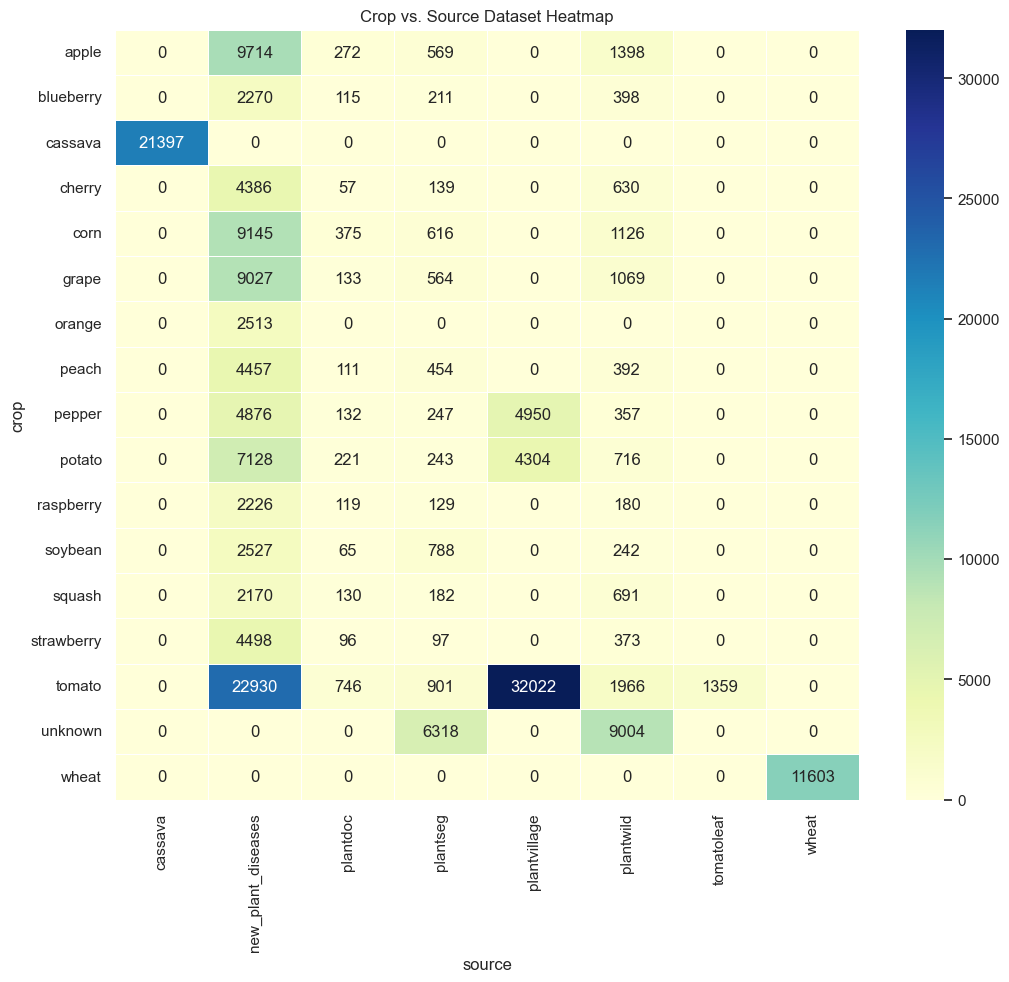

In [22]:
if 'df' in locals():
    pivot_table = pd.crosstab(df['crop'], df['source'])
    
    plt.figure(figsize=(12, 10))
    sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
    plt.title('Crop vs. Source Dataset Heatmap')
    plt.show()

## 4. Class Balance (Top 30 Classes)
Examining the most frequent classes to check for imbalance.

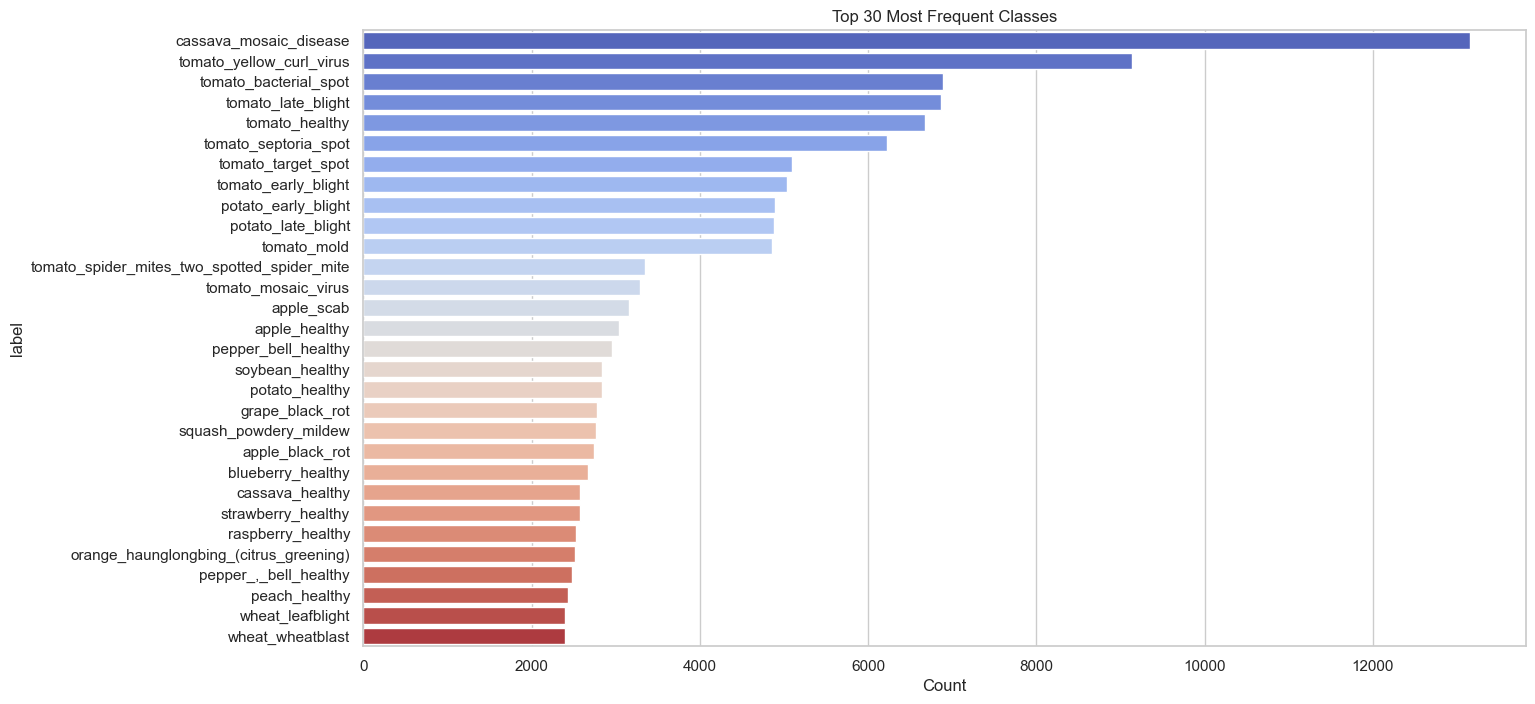

In [23]:
if 'df' in locals():
    top_classes = df['label'].value_counts().head(30)
    
    plt.figure(figsize=(15, 8))
    sns.barplot(y=top_classes.index, x=top_classes.values, hue=top_classes.index, palette='coolwarm', orient='h', legend=False)
    plt.title('Top 30 Most Frequent Classes')
    plt.xlabel('Count')
    plt.show()

## 5. Disease Distribution
Aggregating diseases (ignoring crop type) to see prevalent pathologies.

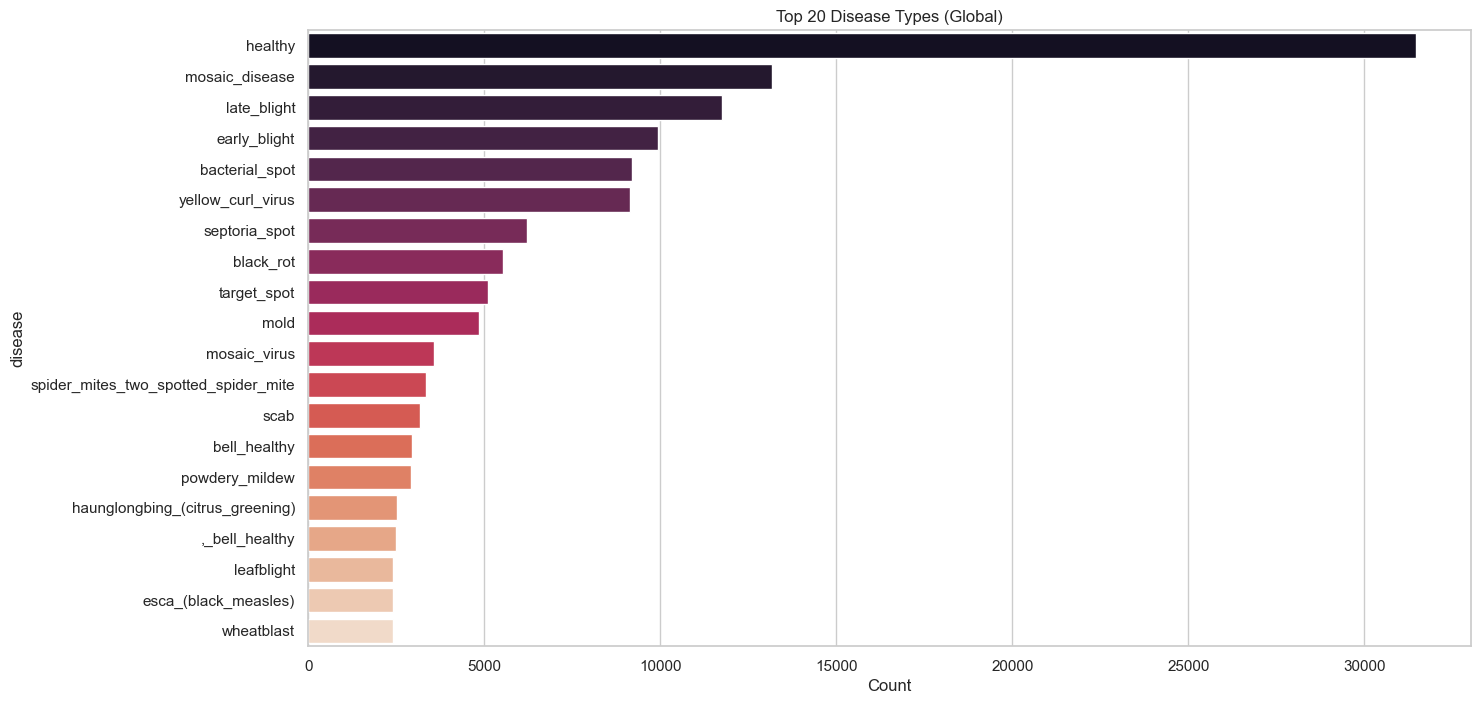

In [24]:
if 'df' in locals():
    disease_counts = df['disease'].value_counts().head(20)
    
    plt.figure(figsize=(15, 8))
    sns.barplot(y=disease_counts.index, x=disease_counts.values, hue=disease_counts.index, palette='rocket', orient='h', legend=False)
    plt.title('Top 20 Disease Types (Global)')
    plt.xlabel('Count')
    plt.show()